# Part 2: Implementing the Perceptron Algorithm
Similarly to what was done in Part 1, in this part of the lab, you will be implementing the percetron's learning algorithm.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def get_x1_boundary(W,b,x2):
    '''Auxiliaty function to get points from the decision boundary.
    Recall the boundary is at w^Tx + b = 0'''
    x1= -(W[1]*x2+b)/W[0]
    return x1

def plot_decision_boundary(w, b, X, y, title):
    '''
    Auxiliary function for plotting
    '''
    x_min = -0.5
    x_max = 3

    h = 1
    xx = np.arange(x_min, x_max, h)

    line_1_x1 = get_x1_boundary(w, b, xx)
    plt.figure(figsize=(3, 3))
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.plot(line_1_x1.T,xx, c="blue")

    plt.title(title)
    plt.xlim([-0.2,1.2])
    plt.ylim([-0.2,1.2])
    plt.show()
    
def plot_decision_boundaries(w1, w2, w3, b1, b2, b3, X, y, title):
    '''
    Auxiliary function for plotting
    '''
    x_min = -0.5
    x_max = 3

    h = 1
    xx = np.arange(x_min, x_max, h)

    line_1_x1 = get_x1_boundary(w1, b1, xx)
    line_2_x1 = get_x1_boundary(w2, b2, xx)
    line_3_x1 = get_x1_boundary(w3, b3, xx)
    plt.figure(figsize=(3, 3))
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.plot(line_1_x1.T,xx, c="blue")
    plt.plot(line_2_x1.T,xx, c="red")
    plt.plot(line_3_x1.T,xx, c="green")

    plt.title(title)
    plt.xlim([-0.2,1.2])
    plt.ylim([-0.2,1.2])
    plt.show()

The perceptron algorithm, as seen in the course, is as follows: 

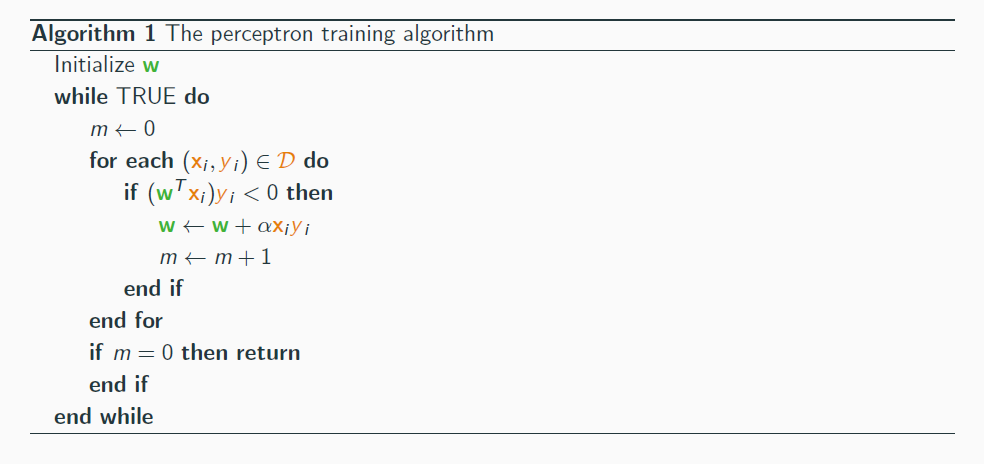

## Exercise 1: Implementing the Perceptron Class 
We will now implement a Perceptron class that contains all the necessary methods to run the perceptron algorithm. The class contains two attributes `w` and `b`, which correspond to the perceptron's parameters. Please note that in this implementation the bias $b$ is separated and not represented in a matrix form.


### Question 1.1 Code inspection
Have a look at the class skeleton provided below and try to understand the code. 
- (True/False) It is possible to initialize the perceptron's parameters with user-provided values. Justify your answer.

__Your Answer here:__  
Yes, it is possible to intialize the preceptron's parameters with user-provided values using the `initialize_weights` function.
It allows the user to supply the weights and bias to the perceptron.

### Task 1.1 Implement the perceptron's update step
Complete the method `gradient_descent_step` to update the perceptron's parameters (i.e. $\mathbf{w} \leftarrow \mathbf{w} +\ldots$ and $b \leftarrow b \ldots$ ) at any given gradient descent step 

### Task 1.2 Implement the perceptron's algorithm
Complete the method `perceptron_algorithm` using Algorithm 1 as a guideline. Make sure you make use of `gradient_descent_step` that you just implemented

### Task 1.3 Implement the percepton's prediction
Implement the `predict` method, which returns labels for a given set of inputs. 

In [3]:
class Perceptron:
    
    def __init__(self):
        '''
        Constructor of the class. Defines the class' two parameters w and b as None
        '''
        self.w = None
        self.b = None
        
    def initialize_weights(self, X, w = None,b = None):
        '''
        Initializes the weights (w) and bias term (b) of the perceptron, making sure that w matches the feature dimension space.
        Both w and b can be provided by the user.
        
        Inputs:
        X - Input dataset
        w - (optional) vector of weights. If not provided, w will be initialized with a random vector
        b - (optional) bias 
        '''
        
        if w is None:
            w = np.random.rand(X.shape[1], 1)
        
        if b is None:
            b =  np.random.rand(1, 1)
            
        self.w = w
        self.b = b
        
        print(f"Initializing weights: shape(w) = {self.w.shape}, shape(b) = {self.b.shape}")
        
    def gradient_descent_step(self, x, y, w, b, alpha):
        '''
        Performs a gradient descent step for the perceptron updating w and b
        
        Input:
        x - input sample
        y - label associated to x
        w - Parameters vector of size D x 1
        b - Bias term (scalar)
        alpha - Learning rate 
        '''
        #YOUR CODE HERE
        w = w + (alpha * (x * y)).reshape(w.shape)
        
        self.w = w
        self.b = b + alpha * y
        print(f"Gradient_descent_step: new weights {self.w} , {self.b}")
        
        return
    
    def perceptron_algorithm(self, X, y, w = None, b = None, alpha = 0.01):
        '''
        Implements the perceptron algorithm as seen in the course. 
        Input:
        X - Matrix with input features
        y - vector of labels
        w - Parameters vector of size D x 1 (optional)
        b - Bias term (optional)
        alpha - Learning rate (default value 0.01)
        
        Returns
        Number of iterations performed
        '''
        
        self.initialize_weights(X, w, b)
        print(f'Initial weights: ({self.w},{self.b})')

        iteration = 0
    
        while True:
            print("*************** Iteration No: ", iteration, "************************")
            #YOUR CODE HERE
            iteration += 1
            m = 0
            for i, x_i in enumerate(X):
                y_i = y[i]
                pred = (np.dot(self.w.reshape(X[0].shape[0],), x_i) + self.b) * y_i
                if pred < 0: # Wrong classification -> Gradient descent step to improve our weights
                    self.gradient_descent_step(x_i, y_i, self.w, self.b, alpha)
                    m += 1
            if m == 0:
                break

        print(f'Final weights: ({self.w},{self.b})')
        return iteration
    
    def predict(self, X):
        '''
        Predicts labels y given an input matrix X
        Input: 
        X- matrix of dimensions N x D

        Output:
        y_pred - vector of labels (dimensions N x 1)
        '''
        #YOUR CODE HERE
        y_pred = [np.dot(self.w.reshape(X[0].shape[0],), x_i) + self.b for x_i in X]
        return y_pred
        

## Exercise 2: Testing your implementation
We will use a very simple scenario to check that the Perceptron's implementation is working. We will use the Perceptron to solve the logical functions AND and OR. These are summarized below:

| A    | B    |  A AND B  |  A OR B | 
|------|------|-----      |-----    |
|  0   |  0   | 0         | 0       |
|  0   |  1   | 0         | 1       | 
|  1   |  0   | 0         | 1       | 
|  1   |  1   | 1         | 1       | 

Let us first code the inputs A,B of the table properly:

In [4]:
X = np.ndarray(shape=(4,2), dtype=int)
X[0,0] = 0
X[0,1] = 0
X[1,0] = 0
X[1,1] = 1
X[2,0] = 1
X[2,1] = 0
X[3,0] = 1
X[3,1] = 1

y_OR = np.array([-1, 1, 1, 1])
y_AND = np.array([-1, -1, -1, 1])

print(X[0].shape)

(2,)


### Task 2.1 OR function
Create an instance of the Perceptron class and store it in a variable called `perceptron_OR`. Call the perceptron_algorithm method and store its output in a variable `iterations_OR`

In [5]:
#YOUR CODE HERE
perceptron_OR = Perceptron()
iterations_OR = perceptron_OR.perceptron_algorithm(X, y_OR, np.array([[0.91724993], [0.86614685]]), np.array([[0.32414625]]), .2)

Initializing weights: shape(w) = (2, 1), shape(b) = (1, 1)
Initial weights: ([[0.91724993]
 [0.86614685]],[[0.32414625]])
*************** Iteration No:  0 ************************
Gradient_descent_step: new weights [[0.91724993]
 [0.86614685]] , [[0.12414625]]
*************** Iteration No:  1 ************************
Gradient_descent_step: new weights [[0.91724993]
 [0.86614685]] , [[-0.07585375]]
*************** Iteration No:  2 ************************
Final weights: ([[0.91724993]
 [0.86614685]],[[-0.07585375]])


If your implementation is correct, it should have converged after a certain number of iterations. Moreover, the decision boundary plotted below should separate properly the two classes.

The perceptron converged in 3 iterations


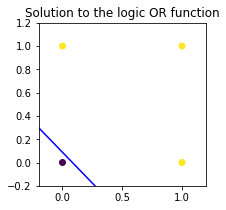

In [6]:
print(f'The perceptron converged in {iterations_OR} iterations')
plot_decision_boundary(perceptron_OR.w, perceptron_OR.b, X, y_OR, 'Solution to the logic OR function')

### Task 2.2 AND function
Repeat the same steps done before for the AND function. Use perceptron_AND and iterations_AND as variables.

In [7]:
#YOUR CODE HERE
perceptron_AND = Perceptron()
iterations_AND = perceptron_AND.perceptron_algorithm(X, y_AND, np.array([[0.91724993], [0.86614685]]), np.array([[0.32414625]]), .2)

Initializing weights: shape(w) = (2, 1), shape(b) = (1, 1)
Initial weights: ([[0.91724993]
 [0.86614685]],[[0.32414625]])
*************** Iteration No:  0 ************************
Gradient_descent_step: new weights [[0.91724993]
 [0.86614685]] , [[0.12414625]]
Gradient_descent_step: new weights [[0.91724993]
 [0.66614685]] , [[-0.07585375]]
Gradient_descent_step: new weights [[0.71724993]
 [0.66614685]] , [[-0.27585375]]
*************** Iteration No:  1 ************************
Gradient_descent_step: new weights [[0.71724993]
 [0.46614685]] , [[-0.47585375]]
Gradient_descent_step: new weights [[0.51724993]
 [0.46614685]] , [[-0.67585375]]
*************** Iteration No:  2 ************************
Final weights: ([[0.51724993]
 [0.46614685]],[[-0.67585375]])


The perceptron converged in 3 iterations


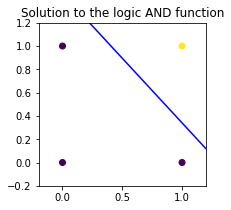

In [8]:
print(f'The perceptron converged in {iterations_AND} iterations')
plot_decision_boundary(perceptron_AND.w, perceptron_AND.b, X, y_AND, 'Solution to the logic AND function')

## Exercise 3: Different initializations of the algorithm
We will now study the effects of initialization in the perceptron algorithm.

### Task 3.1 Multiple runs of the perceptron for the AND function
Instantiate a new Perceptron and store it in a variable called perceptron. Run 3 times the perceptron algorithm to solve the AND logic function. After every run store the obtained parameters in variables w1, b1 (first run); w2, b2 (second run); and w3, b3.

In [9]:
perceptron = Perceptron()

print('****************** First run *******************')
#YOUR CODE HERE
iterations_1 = perceptron.perceptron_algorithm(X, y_AND)
w1 = perceptron.w
b1 = perceptron.b
print('\n****************** Second run *******************')
#YOUR CODE HERE
iterations_2 = perceptron.perceptron_algorithm(X, y_AND)
w2 = perceptron.w
b2 = perceptron.b

print('\n****************** Third run *******************')
#YOUR CODE HERE
iterations_3 = perceptron.perceptron_algorithm(X, y_AND)
w3 = perceptron.w
b3 = perceptron.b

****************** First run *******************
Initializing weights: shape(w) = (2, 1), shape(b) = (1, 1)
Initial weights: ([[0.05892669]
 [0.03610363]],[[0.45145105]])
*************** Iteration No:  0 ************************
Gradient_descent_step: new weights [[0.05892669]
 [0.03610363]] , [[0.44145105]]
Gradient_descent_step: new weights [[0.05892669]
 [0.02610363]] , [[0.43145105]]
Gradient_descent_step: new weights [[0.04892669]
 [0.02610363]] , [[0.42145105]]
*************** Iteration No:  1 ************************
Gradient_descent_step: new weights [[0.04892669]
 [0.02610363]] , [[0.41145105]]
Gradient_descent_step: new weights [[0.04892669]
 [0.01610363]] , [[0.40145105]]
Gradient_descent_step: new weights [[0.03892669]
 [0.01610363]] , [[0.39145105]]
*************** Iteration No:  2 ************************
Gradient_descent_step: new weights [[0.03892669]
 [0.01610363]] , [[0.38145105]]
Gradient_descent_step: new weights [[0.03892669]
 [0.00610363]] , [[0.37145105]]
Gradien

In [10]:
print("Iterations per run")
print(f" 1 | {iterations_1}")
print(f" 2 | {iterations_2}")
print(f" 3 | {iterations_3}")

Iterations per run
 1 | 29
 2 | 30
 3 | 50


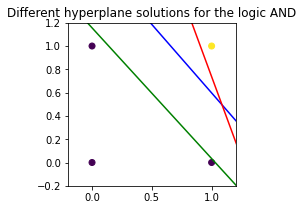

In [11]:
plot_decision_boundaries(w1, w2, w3, b1, b2, b3, X, y_AND, 'Different hyperplane solutions for the logic AND')

### Question 3.1 Analysis
What can you say about the obtained results? What happens with the number of iterations at every run?

__Your answer here:__  
_What can you say about the obtained results?_  
The results differ strongly between runs.
Some are better generalizations to the problem than others but all seperate the two classes fully (on the training data)

_What happens with the number of iterations at every run?_  
The number of iterations varys a lot between runs.
This is because some intializations provide a significantly better generalization upfront than others.

## Exercise 4: Solving the XOR with the perceptron
As we saw in the course, the XOR function, as encoded below, cannot be solved using the perceptron:
    
| A    | B    |  A XOR B  |  
|------|------|-----      |
|  0   |  0   | 0         | 
|  0   |  1   | 1         |  
|  1   |  0   | 1         | 
|  1   |  1   | 0         |

### Task 4.1 Data Transformation 
Propose a transormation of the input features X so that the the perceptron can be used to solve it. Explain your solution, implement it and test it. 

__Explanation:__  
The XOR problem of the perceptron can be solved by adding a new dimension to the data. 
This makes the data linearly seperable again.

There are multiple possibilities to creating this feature but we have decided to use the simplest non trivial polynomial $x^2$ with $x$ beeing the sum of all other dimensions.
This transforms all points of their common plane and allowes a linear seperation between them in 3 dimensions.

In [12]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [13]:
y_XOR = [-1, 1, 1, -1]
#YOUR CODE HERE - DATA TRANSFORMATION
# Add new feature
X_transformed = np.insert(X, 2, 0, axis=1)
for x in X_transformed:
    x[2] = sum(x) ** 2
X_transformed

array([[0, 0, 0],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 4]])

In [14]:
#Create a perceptron and input the data for the XOR
#YOUR CODE HERE
perceptron = Perceptron()
iterations = perceptron.perceptron_algorithm(X_transformed, y_XOR)

Initializing weights: shape(w) = (3, 1), shape(b) = (1, 1)
Initial weights: ([[0.26859818]
 [0.93985578]
 [0.27160669]],[[0.33689014]])
*************** Iteration No:  0 ************************
Gradient_descent_step: new weights [[0.26859818]
 [0.93985578]
 [0.27160669]] , [[0.32689014]]
Gradient_descent_step: new weights [[0.25859818]
 [0.92985578]
 [0.23160669]] , [[0.31689014]]
*************** Iteration No:  1 ************************
Gradient_descent_step: new weights [[0.25859818]
 [0.92985578]
 [0.23160669]] , [[0.30689014]]
Gradient_descent_step: new weights [[0.24859818]
 [0.91985578]
 [0.19160669]] , [[0.29689014]]
*************** Iteration No:  2 ************************
Gradient_descent_step: new weights [[0.24859818]
 [0.91985578]
 [0.19160669]] , [[0.28689014]]
Gradient_descent_step: new weights [[0.23859818]
 [0.90985578]
 [0.15160669]] , [[0.27689014]]
*************** Iteration No:  3 ************************
Gradient_descent_step: new weights [[0.23859818]
 [0.90985578]

In [15]:
# Convergence test
print(f'The perceptron converged in {iterations} iterations')

The perceptron converged in 38 iterations


### Bonus Task: Plotting
Plot the hyperplane with the solution to the XOR using your proposed transformation.

Weights: [[ 0.28859818]
 [ 0.74985578]
 [-0.27839331]]


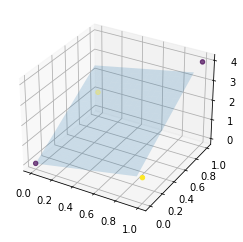

In [17]:
w = perceptron.w
print("Weights:", w)
offset = perceptron.b
Xp = np.arange(0, 1, 0.05)
Yp = np.arange(0, 1, 0.05)
Xp, Yp = np.meshgrid(Xp, Yp)

def plane(x, y):
    return (-w[0]*x - w[1]*y - offset) * 1.0/w[2]
Z = np.vectorize(plane)(Xp, Yp)

# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(Xp, Yp, Z, alpha=0.2)
ax.scatter(X_transformed[:,0], X_transformed[:,1], X_transformed[:,2],  c=[0, 1, 1, 0])